#  Data Cleaning

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline



# Sqlite zipfile

 I grabbed the sql file and all the tables to check if everything came out as it should with the fetchall and then assingned them their own varibales and only used the necessary table we needed to join it with which is the numbers data set. 

In [361]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""").fetchall()
q1 = """SELECT * FROM movie_basics ;"""
q2 = """ SELECT * FROM directors """
q3 = """SELECT *  FROM known_for """
q4 = """SELECT *  FROM movie_akas """
q5 = """ SELECT *  FROM movie_ratings"""
q6 = """ SELECT *  FROM persons"""
q7 = """  SELECT * FROM principals"""
q8 = """  SELECT * FROM writers"""

In [362]:
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [363]:
tn_movie = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie

#Remove all $ and commas for domestic gross, worldwide gross, and production budget

tn_movie["production_budget"]=tn_movie["production_budget"].map(lambda x: int(x.replace(',', '').replace('$', '')))
tn_movie["domestic_gross"]=tn_movie["domestic_gross"].map(lambda x: int(x.replace(',', '').replace('$', '')))
tn_movie["worldwide_gross"]=tn_movie["worldwide_gross"].map(lambda x: int(x.replace(',', '').replace('$', '')))


#Add ROI column - defined as (worldwide_gross - budget)/(worldwide_gross)
tn_movie["ROI"]= 100*(tn_movie["worldwide_gross"]- tn_movie["production_budget"])/    \
         tn_movie["production_budget"]

#Add start year as int column

tn_movie["start_year"] = tn_movie["release_date"].map(lambda x: int(x[-4:]))

#Eliminate any worldwide gross columns that = 0

tn_movie = tn_movie [tn_movie .worldwide_gross != 0]

# tn_movie

In [364]:
q1 = """SELECT * FROM movie_basics ;"""
dfzip=pd.read_sql(q1, conn)
imdb_basics = pd.merge(left= dfzip ,right = tn_movie, left_on=["start_year","primary_title"], right_on=["start_year","movie"], \
                          how = 'inner')
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-99.836209
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,106.440860
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,121.816382
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,666.909239
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-52.122818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",100,"Dec 14, 2018",The Mule,50000000,103804407,170857676,241.715352
1418,tt8043306,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",8,"Jul 20, 2018",Teefa in Trouble,1500000,0,98806,-93.412933
1419,tt8155288,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",78,"Feb 13, 2019",Happy Death Day 2U,9000000,28051045,64179495,613.105500
1420,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,"Sep 21, 2018",Fahrenheit 11/9,5000000,6352306,6653715,33.074300


## Graphing the Data 

Here I dropped the rows with no genres so there are no errors when I eventually code, while also filtering out the years that I needed which were 2012 to 2019 so any thing before doesn't contradict my graph fidnings

In [365]:
imdb_basics=imdb_basics.dropna(subset=['genres']) #Getting rid of rows with 'none' genres

In [366]:
[imdb_basics['start_year']>=2012] #Only using dates from to 2012 and up

[0        True
 1        True
 2        True
 3        True
 4       False
         ...  
 1417     True
 1418     True
 1419     True
 1420     True
 1421     True
 Name: start_year, Length: 1418, dtype: bool]

In [367]:
imdb_basics.info() #info check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418 entries, 0 to 1421
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1418 non-null   object 
 1   primary_title      1418 non-null   object 
 2   original_title     1418 non-null   object 
 3   start_year         1418 non-null   int64  
 4   runtime_minutes    1407 non-null   float64
 5   genres             1418 non-null   object 
 6   id                 1418 non-null   int64  
 7   release_date       1418 non-null   object 
 8   movie              1418 non-null   object 
 9   production_budget  1418 non-null   int64  
 10  domestic_gross     1418 non-null   int64  
 11  worldwide_gross    1418 non-null   int64  
 12  ROI                1418 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 155.1+ KB


## Changing my data back 

Here I had to change the release date back to string because before I had originally changed to datetime which I found was unecessary because I need the abbreviated month for a new column

In [368]:
imdb_basics['release_date'] = imdb_basics['release_date'].astype(str) #changing date back into str so that I can make 
#a new column with the abbreviated month 

<ipython-input-368-8128321daa3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics['release_date'] = imdb_basics['release_date'].astype(str) #changing date back into str so that I can make


## Making a new column for month

I added a new column to the data set because in order to graph which season would be best I needed the month so I grabbed from the release date column and only took the abbreviated month using lambda function which worked out great for me as you can see from the column 

In [369]:
imdb_basics["month"] = imdb_basics["release_date"].map(lambda x: str(x[:4])) # Using lambda to only grab abbreviated the month
#to make the new month column

<ipython-input-369-6ba5bf9bdc1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_basics["month"] = imdb_basics["release_date"].map(lambda x: str(x[:4])) # Using lambda to only grab abbreviated the month


In [370]:
imdb_basics.head() #checking to see if column is there

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,month
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-99.836209,Dec
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,106.440860,Dec
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,121.816382,Sep
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,666.909239,Jun
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,45000000,13109815,21544732,-52.122818,Oct


In [371]:
imdb_basics['month'].value_counts() #checking for unique values

Oct     155
Dec     148
Nov     145
Sep     141
Mar     124
Jul     120
Aug     118
Jun     117
Apr     100
May      96
Feb      86
Jan      68
Name: month, dtype: int64

## Finding ROI for month of the year

Here I had to make a new variable and get every month from the column with the ROI column and find the average using the mean  function and it'll give me the ROI for each month

In [372]:
roi_by_month = [imdb_basics[imdb_basics['month'] =='Jan ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Feb ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Mar ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Apr ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'May ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Jun ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Jul ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Aug ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Sep ']['ROI'].mean(),
                imdb_basics[imdb_basics['month'] == 'Oct ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Nov ']['ROI'].mean(), imdb_basics[imdb_basics['month'] == 'Dec ']['ROI'].mean()]
print(roi_by_month) 
#Taking the Roi of each month and using mean to get the average

[419.2346904409752, 304.70692039806465, 201.21551927654576, 227.56161019345058, 242.0606921637944, 274.83136194716576, 722.4058690645139, 223.6442956415213, 193.64809406299406, 340.30800729081255, 244.50019379481853, 204.48915246083988]


In [373]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #new list for bar graph

In [374]:
imdb_basics.info() #another check!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418 entries, 0 to 1421
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1418 non-null   object 
 1   primary_title      1418 non-null   object 
 2   original_title     1418 non-null   object 
 3   start_year         1418 non-null   int64  
 4   runtime_minutes    1407 non-null   float64
 5   genres             1418 non-null   object 
 6   id                 1418 non-null   int64  
 7   release_date       1418 non-null   object 
 8   movie              1418 non-null   object 
 9   production_budget  1418 non-null   int64  
 10  domestic_gross     1418 non-null   int64  
 11  worldwide_gross    1418 non-null   int64  
 12  ROI                1418 non-null   float64
 13  month              1418 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 166.2+ KB


## The Graph finally 

I used a bar chart to calculate the relationship between them and found that july is the best time to release a movie which is in the season of summer!

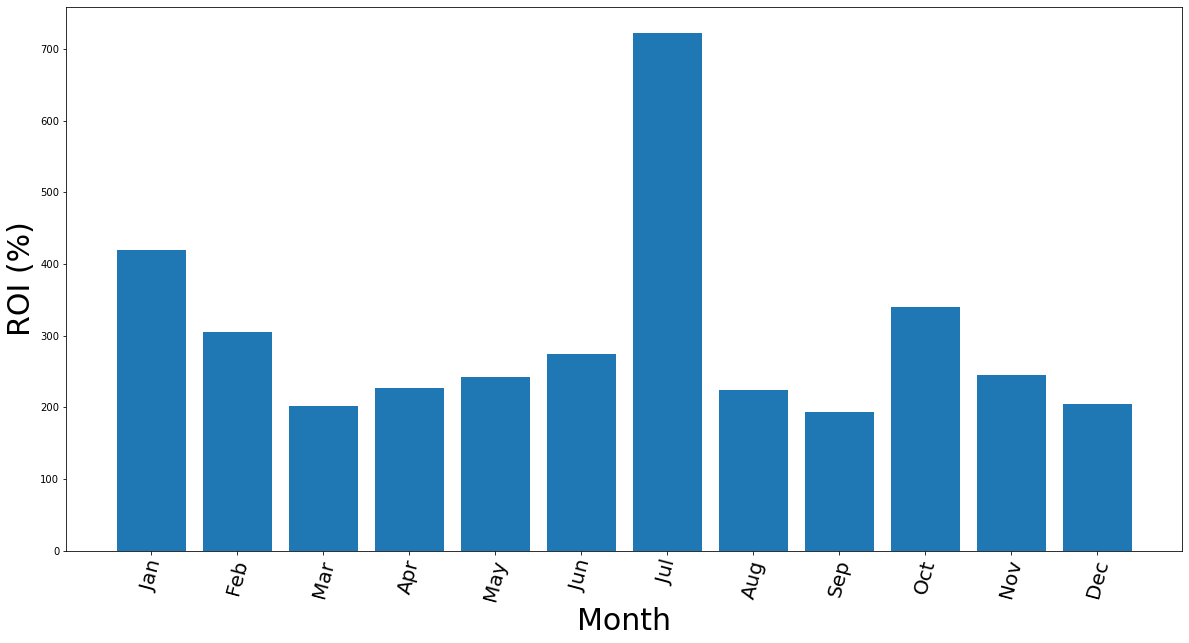

In [382]:
fig, ax = plt.subplots(figsize = (20,10))
x = months
y = roi_by_month
ax.bar(x,y)
plt.xticks(fontsize = 20, rotation = 75)
ax.set_xlabel("Month", fontsize=30)
ax.set_ylabel("ROI (%)", fontsize=30);
       #Graphing to see the connection between month ROI to see 
# which is the best month to release a movie 